In [1]:
"""
QPSK/OFDM Transmitter + Receiver Simulation

1. Generate bits
2. QPSK modulation
3. OFDM modulation
4. Channel
5. ???
6. Demodulation
7. Analysis

Date created: 6/9/25
Author: Cole Delong
"""

'\nQPSK/OFDM Transmitter + Receiver Simulation\n\n1. Generate bits\n2. QPSK modulation\n3. OFDM modulation\n4. Channel\n5. ???\n6. Demodulation\n7. Analysis\n\nDate created: 6/9/25\nAuthor: Cole Delong\n'

In [2]:
%reload_ext autoreload
%autoreload 2

# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

### Constants
SPS = 2     # QPSK
N_SYMS = int(16)
N_BITS = N_SYMS*SPS

# OFDM
N_SUBCARRIERS = 8
N_SUBCARRIERS_PER_PILOT = 8
CP_LENGTH = 8
PILOT_TONE = 1 + 1j


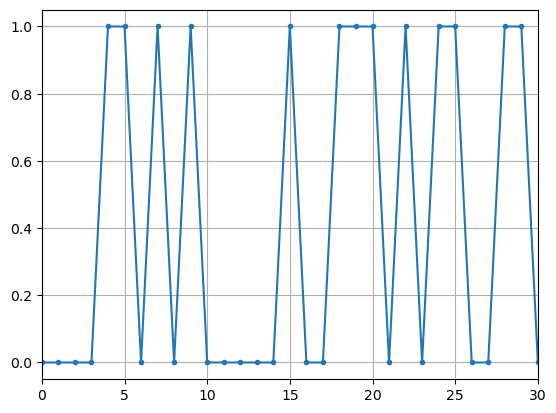

In [3]:
### Generate bits ###
bits = np.random.binomial(n=1, p=0.5, size=N_BITS)

plt.plot(bits, '.-')
plt.grid(True)
plt.xlim([0, 30])
plt.show()

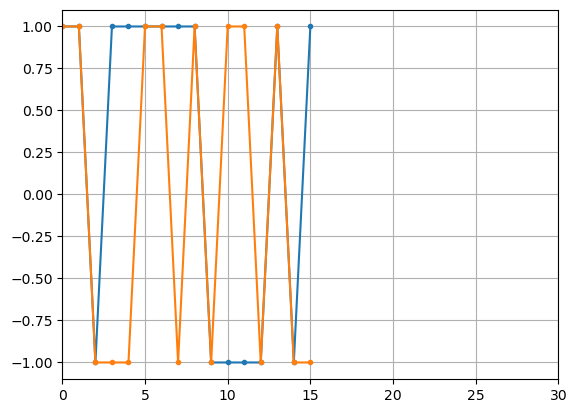

In [4]:
### QPSK modulation ###
bit_pairs = bits.reshape(-1, 2)
mapping = {
    (0, 0):  1 + 1j,
    (0, 1):  1 - 1j,
    (1, 1): -1 - 1j,
    (1, 0): -1 + 1j,
}
fsymbols_data = np.array([mapping[tuple(pair)] for pair in bit_pairs], dtype=np.complex128)

plt.plot(fsymbols_data.real, '.-')
plt.plot(fsymbols_data.imag, '.-')
plt.xlim([0, 30])
plt.grid(True)
plt.show()

In [ ]:
### OFDM modulation ###

# Calculate pilot subcarrier indicies within each time symbol
all_sc_ind = np.arange(N_SUBCARRIERS)

pilot_sc_ind = all_sc_ind[::N_SUBCARRIERS_PER_PILOT]
pilot_sc_ind = np.append(pilot_sc_ind, all_sc_ind[-1])

data_sc_ind = np.delete(all_sc_ind, pilot_sc_ind)

# Total number of data frequency symbols per time symbol
n_data_fsymbols_per_tsymbol = len(data_sc_ind)

# Total numbers of time and frequency symbols in transmission
n_tsymbols = int(np.ceil(N_SYMS / n_data_fsymbols_per_tsymbol))
n_fsymbols = n_tsymbols*N_SUBCARRIERS


# Add padding to data symbols so there are no holes at the end of the transmission
n_padding_needed = n_data_fsymbols_per_tsymbol - (N_SYMS%n_data_fsymbols_per_tsymbol)
padding = [PILOT_TONE] * n_padding_needed
fsymbols_data_padding = np.append(fsymbols_data, padding)
fsymbols_data_parallel = np.reshape(fsymbols_data_padding, (-1, n_data_fsymbols_per_tsymbol))

# Fill parllel frequency symbol array with pilots and data
fsymbols_parallel = np.empty((n_tsymbols, N_SUBCARRIERS), dtype=np.complex64)
fsymbols_parallel[:, pilot_sc_ind] = PILOT_TONE
fsymbols_parallel[:, data_sc_ind]  = fsymbols_data_parallel


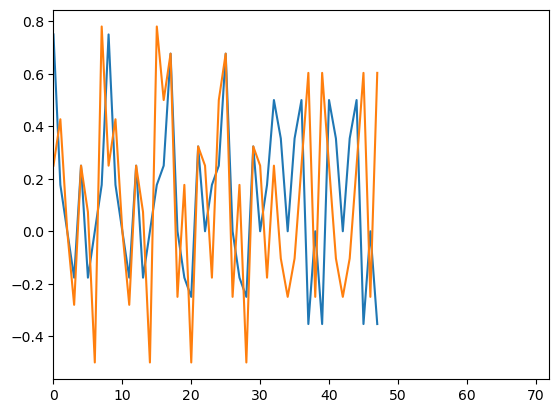

In [6]:
# IFFT
ofdm_time = np.fft.ifft(fsymbols_parallel, axis=1)

# Add cyclic prefixes
cyclic_prefixes = np.array([symbol[-CP_LENGTH:] for symbol in ofdm_time])
ofdm_time = np.hstack((cyclic_prefixes, ofdm_time))

# Serialize symbols
ofdm_time = np.concatenate(ofdm_time)

plt.plot(ofdm_time.real)
plt.plot(ofdm_time.imag)
plt.xlim([0, 64+8])
plt.show()

In [7]:
a = [0, 0, 1]
a = [1, 2, 2, 2]
b = [1, 2, 3]
np.delete(b, a)

array([1])